<a href="https://colab.research.google.com/github/cuboidalstudios/MLAssignment2025/blob/main/MLTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Churn EDA Notebook
### Machine Learning Coursework – Task 1
This notebook performs data cleaning, feature engineering, and exploratory data analysis on the Telco Customer Churn dataset.

## Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## Load Dataset

In [59]:
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Telco-Customer-Churn.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

In [60]:
# Find Missing Values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [61]:
# Clean TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df = df[df['tenure'] > 0]
df.head()

/tmp/ipython-input-1840717302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Feature Engineering

In [62]:
# Encode churn labels (Yes = 1, No = 0)
df['Churn_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Create average monthly spend
df['AvgMonthlySpend'] = df['TotalCharges'] / df['tenure']

# Create tenure categories (binning)
df['TenureCategory'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 100],
    labels=['0-1yr', '1-2yr', '2-4yr', '4+yr']
)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded,AvgMonthlySpend,TenureCategory
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,29.850000,0-1yr
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0,55.573529,2-4yr
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,54.075000,0-1yr
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,40.905556,2-4yr
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,75.825000,0-1yr


# Exploratory Data Analysis

### Five Number Summary

In [63]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']
df[num_cols].describe().loc[['min', '25%', '50%', '75%', 'max']]

,tenure,MonthlyCharges,TotalCharges,AvgMonthlySpend
min,1.0,18.2500,18.8000,13.775000
25%,9.0,35.5875,401.4500,36.179891
50%,29.0,70.3500,1397.4750,70.373239
75%,55.0,89.8625,3794.7375,90.179560
max,72.0,118.7500,8684.8000,121.400000


### Churn distribution

In [64]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


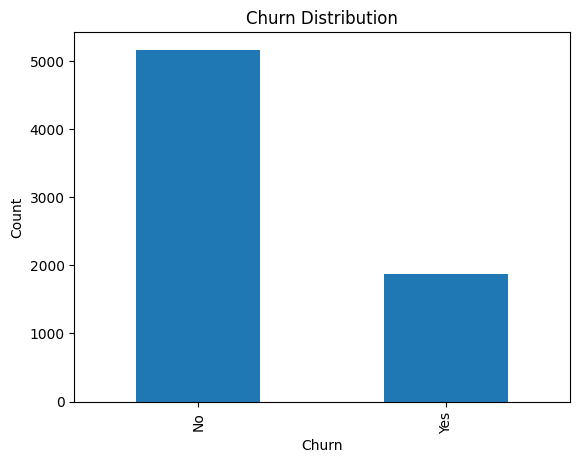

In [65]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
# plt.grid(True)
plt.show()

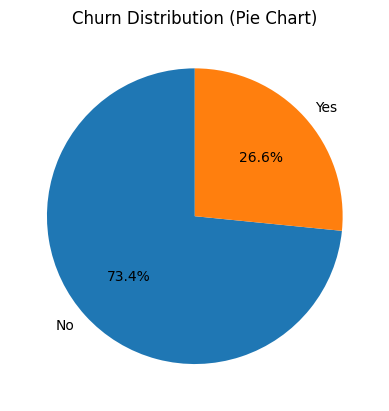

In [66]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution (Pie Chart)')
plt.ylabel('') # Hide the y-label for pie charts
plt.show()

### tenure distribution

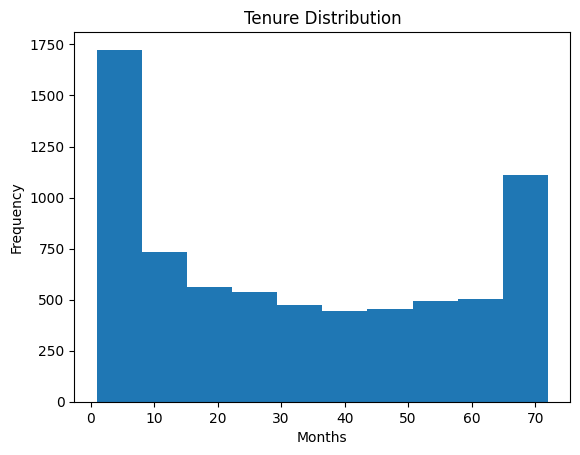

In [67]:
# Plot tenure distribution
df['tenure'].plot(kind='hist')
plt.title('Tenure Distribution')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

### Numerical Feature Correlation Analysis

In [68]:
# Correlation matrix
df_corr = df.corr(numeric_only=True)
df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_encoded,AvgMonthlySpend
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.217616
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,0.246198
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.996237
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,0.650915
Churn_encoded,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.192033
AvgMonthlySpend,0.217616,0.246198,0.996237,0.650915,0.192033,1.000000


<Axes: >

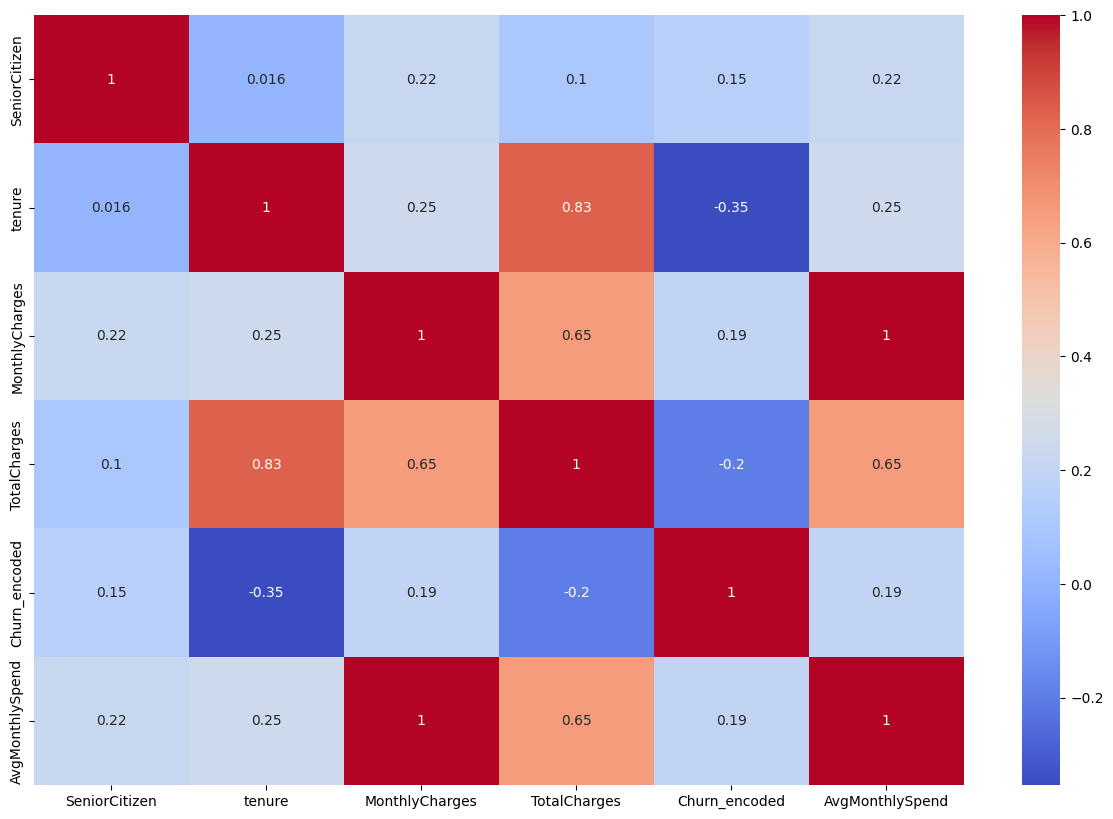

In [70]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

### correlation analysis of categorical features by churn

In [76]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))


In [91]:
categorical_cols = df.select_dtypes(include='object').columns.drop('customerID')  # all categorical except ID

cat_corr = {}
for col in categorical_cols:
    cat_corr[col] = cramers_v(df[col], df['Churn_encoded'])

# Convert to a sorted series
cat_corr = pd.Series(cat_corr).sort_values(ascending=False)
cat_corr

,0
Churn,0.999636
Contract,0.409560
OnlineSecurity,0.346992
TechSupport,0.342506
InternetService,0.321909
PaymentMethod,0.302960
OnlineBackup,0.291902
DeviceProtection,0.281159
StreamingMovies,0.230702
StreamingTV,0.230143


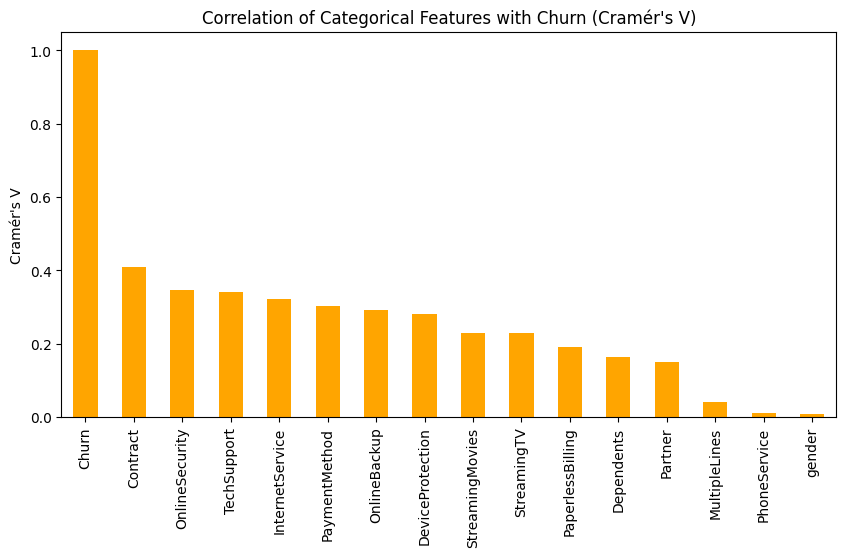

In [104]:
plt.figure(figsize=(10,5))
cat_corr.plot(kind='bar', color='orange')
plt.title("Correlation of Categorical Features with Churn (Cramér's V)")
plt.ylabel("Cramér's V")
plt.show()

### Monthly Charges by Churn

<Figure size 800x500 with 0 Axes>

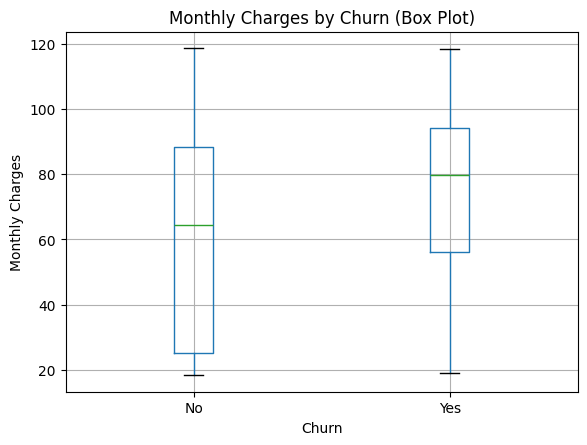

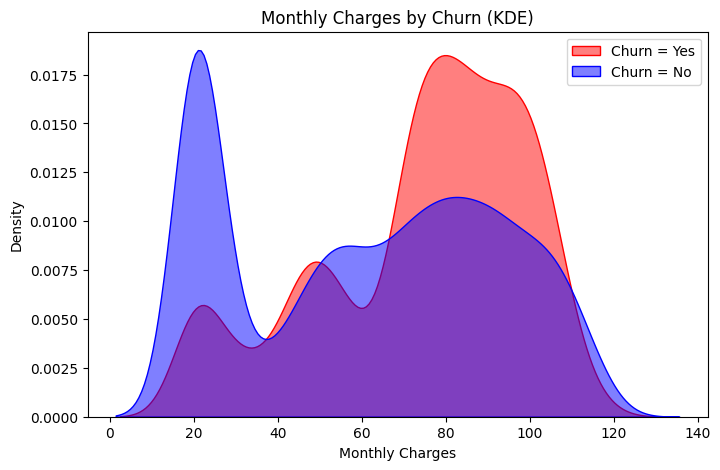

In [112]:
# Box Plot
plt.figure(figsize=(8,5))

df.boxplot(column='MonthlyCharges', by='Churn')
plt.title("Monthly Charges by Churn (Box Plot)")
plt.suptitle('')
plt.ylabel("Monthly Charges")
plt.show()

# KDE plot (filled) per churn group
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df[df['Churn']=='Yes'], x='MonthlyCharges', fill=True, color='red', alpha=0.5, label='Churn = Yes'
)
sns.kdeplot(
    data=df[df['Churn']=='No'], x='MonthlyCharges', fill=True, color='blue', alpha=0.5, label='Churn = No'
)

plt.title('Monthly Charges by Churn (KDE)')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()

### Tenure by Churn

<Figure size 800x500 with 0 Axes>

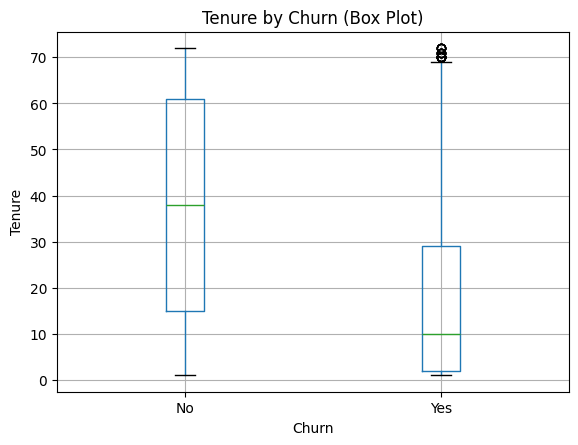

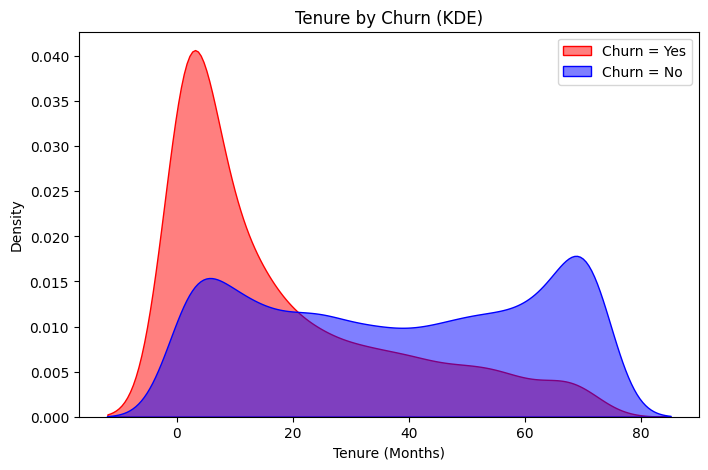

In [111]:
# Box Plot
plt.figure(figsize=(8,5))

df.boxplot(column='tenure', by='Churn')
plt.title("Tenure by Churn (Box Plot)")
plt.suptitle('')
plt.ylabel("Tenure")
plt.show()


# KDE plot
plt.figure(figsize=(8,5))

sns.kdeplot(
    data=df[df['Churn']=='Yes'], x='tenure', fill=True, color='red', alpha=0.5, label='Churn = Yes'
)
sns.kdeplot(
    data=df[df['Churn']=='No'], x='tenure', fill=True, color='blue', alpha=0.5, label='Churn = No'
)

plt.title('Tenure by Churn (KDE)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend()
plt.show()

### Contract Type by Churn

<Figure size 800x500 with 0 Axes>

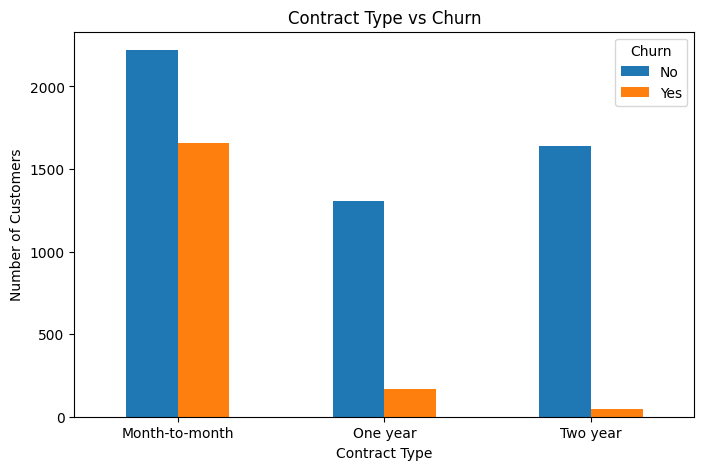

In [82]:
plt.figure(figsize=(8,5))

# Count of churn per contract type
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()

# Double bar chart
contract_churn.plot(kind='bar', figsize=(8,5))

plt.title('Contract Type by Churn')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

<Figure size 800x500 with 0 Axes>

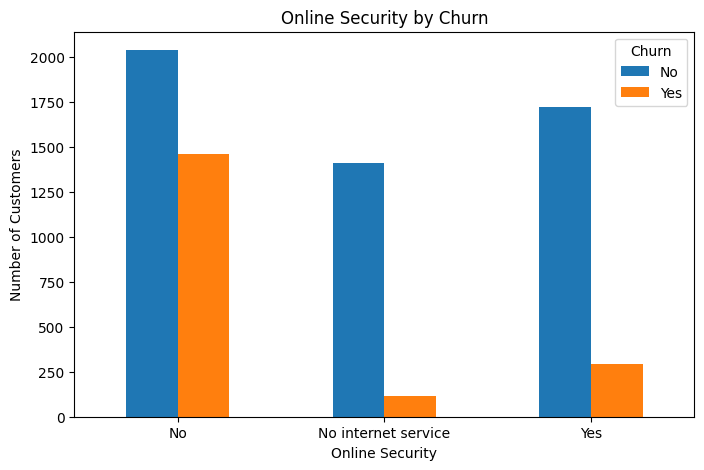

In [92]:
plt.figure(figsize=(8,5))

# Count of churn per online security
online_security_churn = df.groupby(['OnlineSecurity', 'Churn']).size().unstack()

# Double bar chart
online_security_churn.plot(kind='bar', figsize=(8,5))

plt.title('Online Security by Churn')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

<Figure size 800x500 with 0 Axes>

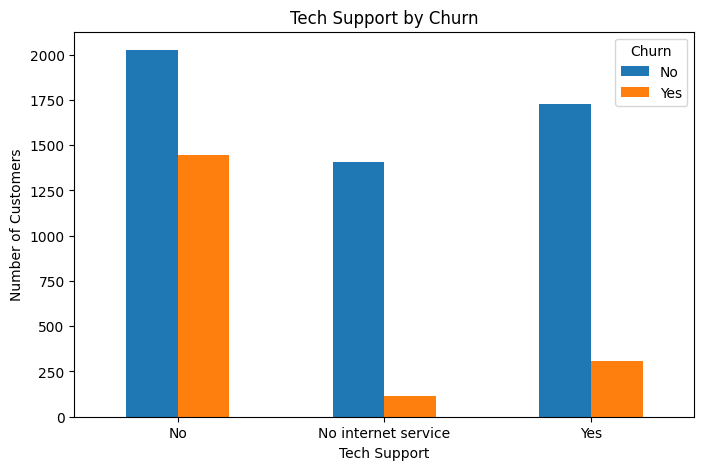

In [93]:
plt.figure(figsize=(8,5))

# Count of churn per tech support
tech_support_churn = df.groupby(['TechSupport', 'Churn']).size().unstack()

# Double bar chart
tech_support_churn.plot(kind='bar', figsize=(8,5))

plt.title('Tech Support by Churn')
plt.xlabel('Tech Support')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()